# Reproducing some results from K.D. Petersson et al. (Nature 2012)

J. R. Johansson, http://jrjohansson.github.com, <robert@riken.jp>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sympy import *
import numpy

In [3]:
init_printing()

In [4]:
TP = 2 * numpy.pi

In [5]:
ai = Symbol('a_in')
ao = Symbol('a_out')
bi = Symbol('b_in')
bo = Symbol('b_out')

In [6]:
# fundamental parameters
wR = Symbol('omega_R', real=True) # probe field frequency
w0 = Symbol('omega_0', real=True) # cavity frequency

k1 = Symbol('kappa_1', real=True)
k2 = Symbol('kappa_2', real=True)
ki = Symbol('kappa_i', real=True)
sigma_e = Symbol('sigma_e', real=True)

gamma  = Symbol('gamma', real=True)

tc = Symbol('t_c', real=True)
de = Symbol('delta_epsilon', real=True)
e  = Symbol('epsilon', real=True)
gc = Symbol('g_c', real=True)

X, Y = symbols("X, Y")

In [7]:
param_fundamental     = {tc: 3.5 * TP, 
                         w0: 6.1948 * TP,
                         gc: 0.030 * TP, 
                         k1: 0.015, 
                         k2: 0.015, 
                         ki: 0.00, 
                         sigma_e: 5.1 * TP, 
                         gamma: 0.066} # 15ns

param_fundamental_all = {wR: 6.1948 * TP,
                         e: 0}

param_fundamental_all.update(param_fundamental)

In [8]:
# derived parameters
delta0 = Symbol('Delta_0', real=True)
delta  = Symbol('Delta',   real=True)
W      = Symbol('Omega', real=True)

geff   = Symbol('g_eff', real=True)
chi    = Symbol('chi', real=True)
k      = Symbol('kappa', real=True)

## Using derived parameters

In [9]:
ao = -I * sqrt(k1*k2) * bi / (delta0 - I*k/2 + geff * chi)

ao

          _______ 
-ⅈ⋅b_in⋅╲╱ κ₁⋅κ₂  
──────────────────
               ⅈ⋅κ
Δ₀ + χ⋅g_eff - ───
                2 

In [10]:
# the transmission coefficient
T = ao.subs(ai,0) / (bi)

T

       _______    
  -ⅈ⋅╲╱ κ₁⋅κ₂     
──────────────────
               ⅈ⋅κ
Δ₀ + χ⋅g_eff - ───
                2 

## Using fundamental parameters

In [11]:
W_num = sqrt((2*tc)**2 + e**2)

W_num

   _____________
  ╱  2        2 
╲╱  ε  + 4⋅t_c  

In [12]:
# probe field detuning from atom
delta_num = W - wR

delta_num

Ω - omega_R

In [13]:
# cavity frequency detuning from probe frequency
delta0_num = w0 - wR

delta0_num

ω₀ - omega_R

In [14]:
geff_num = gc * 2 * tc / W

geff_num

2⋅g_c⋅t_c
─────────
    Ω    

In [15]:
chi_num = geff / (-delta + I * gamma / 2)

chi_num

 g_eff  
────────
     ⅈ⋅γ
-Δ + ───
      2 

In [16]:
delta_phi = - arg(T) * 180/pi

In [17]:
param_derived = {W: W_num,
                 geff: geff_num,
                 chi:  chi_num,
                 delta0: delta0_num,
                 delta: delta_num,
                 k: k1 + k2 + ki}

In [18]:
chi.subs(param_derived).subs(param_derived)

                     2⋅g_c⋅t_c                     
───────────────────────────────────────────────────
   _____________ ⎛                   _____________⎞
  ╱  2        2  ⎜ⅈ⋅γ               ╱  2        2 ⎟
╲╱  ε  + 4⋅t_c  ⋅⎜─── + omega_R - ╲╱  ε  + 4⋅t_c  ⎟
                 ⎝ 2                              ⎠

In [19]:
T.subs(param_derived).subs(param_derived)

                                       _______                                
                                  -ⅈ⋅╲╱ κ₁⋅κ₂                                 
──────────────────────────────────────────────────────────────────────────────
                       2    2                                                 
                  4⋅g_c ⋅t_c                                      ⅈ⋅(κ₁ + κ₂ +
──────────────────────────────────────────────── + ω₀ - omega_R - ────────────
              ⎛                   _____________⎞                         2    
⎛ 2        2⎞ ⎜ⅈ⋅γ               ╱  2        2 ⎟                              
⎝ε  + 4⋅t_c ⎠⋅⎜─── + omega_R - ╲╱  ε  + 4⋅t_c  ⎟                              
              ⎝ 2                              ⎠                              

    
    
────
    
 κᵢ)
────
    
    
    
    

In [20]:
delta_phi.subs(param_derived).subs(param_derived)

        ⎛                                       _______                       
        ⎜                                  -ⅈ⋅╲╱ κ₁⋅κ₂                        
-180⋅   ⎜─────────────────────────────────────────────────────────────────────
        ⎜                       2    2                                        
        ⎜                  4⋅g_c ⋅t_c                                      ⅈ⋅(
        ⎜──────────────────────────────────────────────── + ω₀ - omega_R - ───
     arg⎜              ⎛                   _____________⎞                     
        ⎜⎛ 2        2⎞ ⎜ⅈ⋅γ               ╱  2        2 ⎟                     
        ⎜⎝ε  + 4⋅t_c ⎠⋅⎜─── + omega_R - ╲╱  ε  + 4⋅t_c  ⎟                     
        ⎝              ⎝ 2                              ⎠                     
──────────────────────────────────────────────────────────────────────────────
                                              π                               

             ⎞ 
             ⎟ 
─────────────⎟ 
   

## Test conditions

In [21]:
(2*tc > wR).subs(param_derived).subs(param_fundamental_all)

True

In [22]:
(delta > gamma/2).subs(param_derived).subs(param_fundamental_all)

True

## Using numerical values for parameters

In [23]:
(2*tc/wR).subs(param_derived).subs(param_fundamental_all).evalf()

1.12997998321173

In [24]:
(delta/(gamma/2)).subs(param_derived).subs(param_fundamental_all).evalf()

153.309721495182

## Unit conversions

In [25]:
def GHz_to_meV(w_GHz):
    # 1 GHz = 4.1357e-6 eV = 4.1357e-3 meV
    w_meV = w_GHz * 4.1357e-3
    return w_meV

def meV_to_GHz(w_meV):
    # 1 meV = 1.0/4.1357e-3 GHz
    w_GHz = w_meV / 4.1357e-3
    return w_GHz

### Plot the reflection phase shift as a function of probe freqency

In [26]:
wR_vec = linspace(6.190, 6.20, 1000) * TP

T0_lambda = lambdify(X, T.subs(param_derived).subs(param_derived).subs({e: 0.0, wR: X}).subs(param_fundamental), 'numpy')
T1_lambda = lambdify(X, T.subs(param_derived).subs(param_derived).subs({e: 3.0 * TP, wR: X}).subs(param_fundamental), 'numpy')

T0_vec = T0_lambda(wR_vec)
T1_vec = T1_lambda(wR_vec)

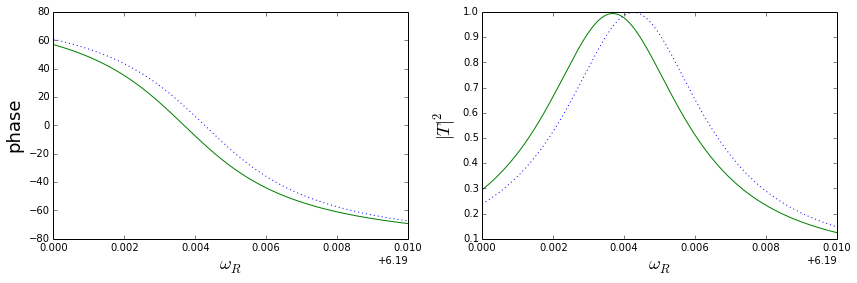

In [27]:
fig, axes = subplots(1,2, figsize=(12,4))

# according to phase definition in Petersson et al
axes[0].plot(wR_vec/TP, -numpy.angle(T0_vec) * 180/pi, color="green")
axes[0].plot(wR_vec/TP, -numpy.angle(T1_vec) * 180/pi, 'b:')
axes[0].set_ylabel("phase", fontsize=18)
axes[0].set_xlabel(r'$\omega_R$', fontsize=18)

axes[1].plot(wR_vec/TP, numpy.abs(T0_vec)**2, color="green")
axes[1].plot(wR_vec/TP, numpy.abs(T1_vec)**2, 'b:')
axes[1].set_ylabel(r'$|T|^2$', fontsize=18)
axes[1].set_xlabel(r'$\omega_R$', fontsize=18);

fig.tight_layout()

### Plot the reflection phase shift as a function of bias

In [28]:
e_vec = linspace(-20.0, 20.0, 500) * TP

T_lambda = lambdify(X, T.subs(param_derived).subs(param_derived).subs({tc: (3.5/2) * TP, e: X}).subs(param_fundamental_all), 'numpy')

T_vec = T_lambda(e_vec)

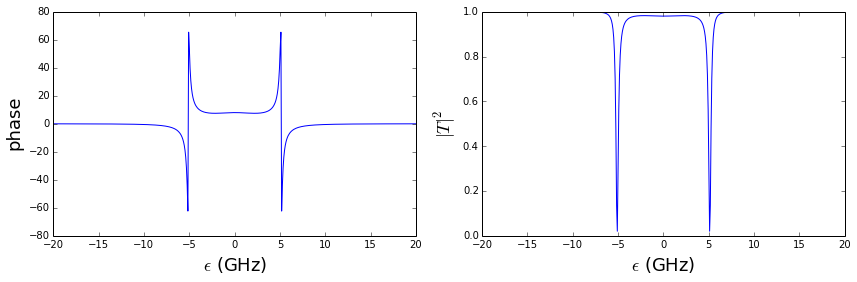

In [29]:
fig, axes = subplots(1,2, figsize=(12,4))

# according to phase definition in Petersson et al
axes[0].plot(e_vec/TP, -numpy.angle(T_vec) * 180/pi)
axes[1].plot(e_vec/TP, numpy.abs(T_vec)**2)

axes[0].set_ylabel("phase", fontsize=18)
axes[0].set_xlabel(r'$\epsilon$ (GHz)', fontsize=18)
axes[1].set_ylabel(r'$|T|^2$', fontsize=18)
axes[1].set_xlabel(r'$\epsilon$ (GHz)', fontsize=18);

fig.tight_layout()

## Plot Omega vs bias

In [30]:
tc_vec = array([1.8, 5.1, 5.8, 6.2, 7.0]) / 2.0 * TP

In [31]:
e_vec = np.linspace(meV_to_GHz(-0.12), meV_to_GHz(0.12), 1000) * TP

In [32]:
W_lambda = lambdify((X, Y), W.subs(param_derived).subs(param_derived).subs(e, X).subs(tc, Y), 'numpy')
W_mat = [W_lambda(e_vec, tc_num) for tc_num in tc_vec]

tc_num = tc_vec[0]
chi_lambda = lambdify((X, Y), chi.subs(param_derived).subs(param_derived).subs({e: X, tc: Y}).subs(param_fundamental_all), 'numpy')
chi_vec = chi_lambda(e_vec, tc_num)

In [33]:
w0_num = (w0 / (2*pi)).subs(param_fundamental_all).evalf()

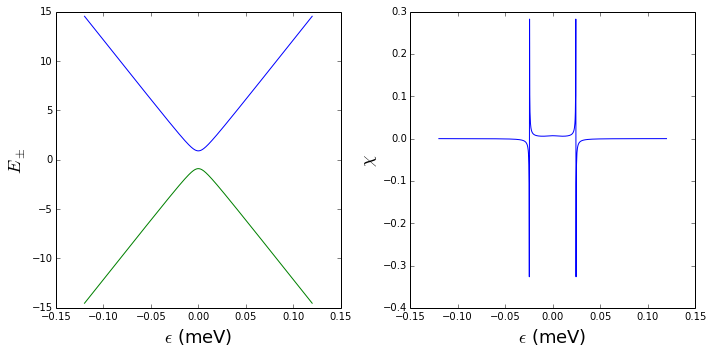

In [34]:
fig, axes = subplots(1,2, figsize=(10, 5))

axes[0].plot(GHz_to_meV(e_vec/TP), +0.5 * real(W_mat[0])/TP)
axes[0].plot(GHz_to_meV(e_vec/TP), -0.5 * real(W_mat[0])/TP)
axes[0].set_ylabel(r'$E_\pm$', fontsize=18)
axes[0].set_xlabel(r'$\epsilon$ (meV)', fontsize=18)

axes[1].plot(GHz_to_meV(e_vec/TP), real(chi_vec))
axes[1].set_ylabel(r'$\chi$', fontsize=18)
axes[1].set_xlabel(r'$\epsilon$ (meV)', fontsize=18)

fig.tight_layout()

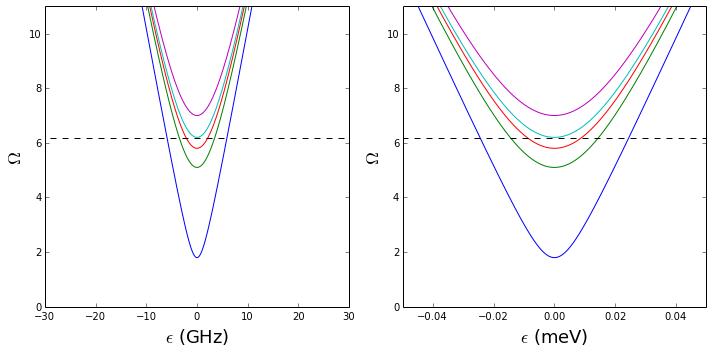

In [35]:
fig, axes = subplots(1,2, figsize=(10,5))

# GHz
for W_vec in W_mat:
    axes[0].plot(e_vec/TP, real(W_vec)/TP)

axes[0].plot(e_vec/TP, w0_num * np.ones(shape(e_vec)), 'k--')

axes[0].set_ylabel(r'$\Omega$', fontsize=18)
axes[0].set_xlabel(r'$\epsilon$ (GHz)', fontsize=18)
axes[0].set_ylim(0, 11)
axes[1].set_xlim(meV_to_GHz(-0.05), meV_to_GHz(0.05))

# meV
for W_vec in W_mat:
    axes[1].plot(GHz_to_meV(e_vec/TP), real(W_vec)/TP)

axes[1].plot(GHz_to_meV(e_vec/TP), w0_num * np.ones(shape(e_vec)), 'k--')

axes[1].set_ylabel(r'$\Omega$', fontsize=18)
axes[1].set_xlabel(r'$\epsilon$ (meV)', fontsize=18)
axes[1].set_ylim(0, 11)
axes[1].set_xlim(-0.05, 0.05)

fig.tight_layout()

## Plot phase shift vs bias

In [36]:
#delta_phi_mat = array([[delta_phi.subs(param_derived).subs({e: e_num, tc: tc_num}).subs(param_fundamental_all).evalf()
#                        for e_num in e_vec]
#                       for tc_num in tc_vec], dtype=complex)

delta_phi_lambda = lambdify((X, Y), delta_phi.subs(param_derived).subs(param_derived).subs({e: X, tc: Y}).subs(param_fundamental_all), 'numpy')
delta_phi_mat = array([delta_phi_lambda(e_vec, tc_num) for tc_num in tc_vec], dtype=complex)

### Without cavity convolution

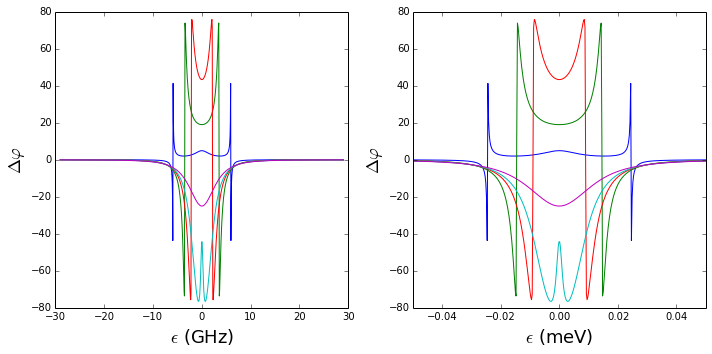

In [37]:
fig, axes = subplots(1,2, figsize=(10,5))

# GHz
for idx, delta_phi_vec in enumerate(delta_phi_mat):
    axes[0].plot(e_vec/TP, - idx * 0.0 + real(delta_phi_vec))

axes[0].set_ylabel(r'$\Delta\varphi$', fontsize=18)
axes[0].set_xlabel(r'$\epsilon$ (GHz)', fontsize=18)
axes[1].set_xlim(meV_to_GHz(-0.05), meV_to_GHz(0.05))

# meV
for idx, delta_phi_vec in enumerate(delta_phi_mat):
    axes[1].plot(GHz_to_meV(e_vec/TP), real(delta_phi_vec))

axes[1].set_ylabel(r'$\Delta\varphi$', fontsize=18)
axes[1].set_xlabel(r'$\epsilon$ (meV)', fontsize=18)
axes[1].set_xlim(-0.05, 0.05)

fig.tight_layout()

### Definition of cavity convolution function

In [38]:
def cavity_convolution_func(w_vec, w0):
    g = numpy.exp(-(w_vec-w0)**2/param_fundamental[sigma_e]**2)

    return g / numpy.sum(g)

In [39]:
def cavity_convolution(w_vec, f_vec):
    return array([numpy.sum(f_vec * cavity_convolution_func(w_vec, w)) for w in w_vec])

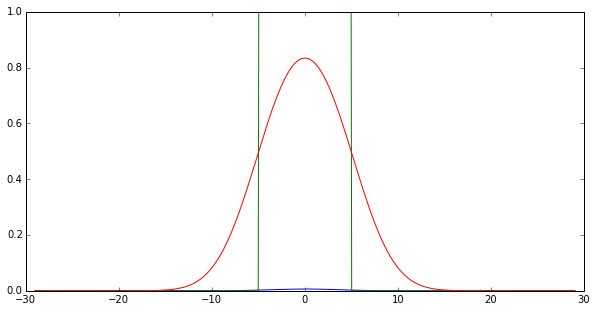

In [40]:
fig, ax = subplots(1, 1, figsize=(10,5))

f_vec = abs(e_vec) < 5*TP
w0 = 0 * TP
ax.plot(e_vec/TP, cavity_convolution_func(e_vec, w0))
ax.plot(e_vec/TP, f_vec)
ax.plot(e_vec/TP, cavity_convolution(e_vec, f_vec));

### With cavity convolution

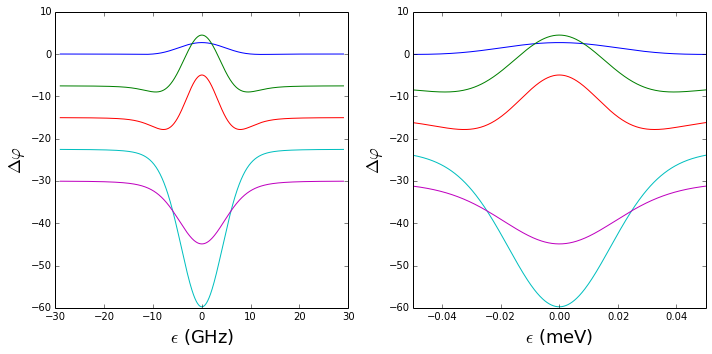

In [41]:
fig, axes = subplots(1,2, figsize=(10,5))

# GHz
for idx, delta_phi_vec in enumerate(delta_phi_mat):
    axes[0].plot(e_vec/TP, - idx * 7.5 + real(cavity_convolution(e_vec, delta_phi_vec)))

axes[0].set_ylabel(r'$\Delta\varphi$', fontsize=18)
axes[0].set_xlabel(r'$\epsilon$ (GHz)', fontsize=18)
axes[1].set_xlim(meV_to_GHz(-0.05), meV_to_GHz(0.05))

# meV
for idx, delta_phi_vec in enumerate(delta_phi_mat):
    axes[1].plot(GHz_to_meV(e_vec/TP), - idx * 7.5 + real(cavity_convolution(e_vec, delta_phi_vec)))

axes[1].set_ylabel(r'$\Delta\varphi$', fontsize=18)
axes[1].set_xlabel(r'$\epsilon$ (meV)', fontsize=18)
axes[1].set_xlim(-0.05, 0.05)

fig.tight_layout()

## Versions

In [42]:
%load_ext version_information

In [43]:
%version_information numpy, sympy, matplotlib

Software versions
Python 3.3.2+ (default, Oct  9 2013, 14:50:09) [GCC 4.8.1]
IPython 1.1.0
OS posix [linux]
numpy 1.7.1
sympy 0.7.3
matplotlib 1.3.1

Fri Nov 01 11:53:00 2013 KST